Part 2

Loaded rows: 3975
Rows after removing missing values: 3975


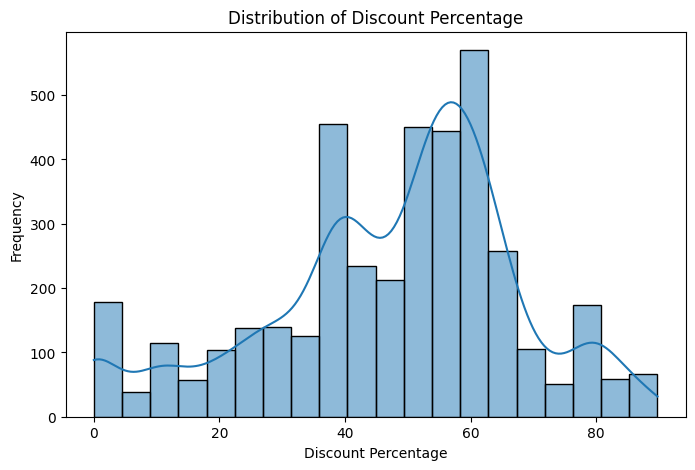

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("cleaned_ebay_deals.csv")
print("Loaded rows:", len(df))

columns_to_check = ['price', 'original_price', 'shipping', 'discount_percentage']
df = df.dropna(subset=columns_to_check)
print("Rows after removing missing values:", len(df))

plt.figure(figsize=(8, 5))
sns.histplot(df['discount_percentage'], kde=True, bins=20)
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()


Part 3

In [38]:
bins = [0, 10, 30, np.inf]
labels = ['Low', 'Medium', 'High']
df['discount_bin'] = pd.cut(df['discount_percentage'], bins=bins, labels=labels, right=True, include_lowest=True)

bin_counts = df['discount_bin'].value_counts()
print("Original bin counts:")
print(bin_counts)

min_count = bin_counts.min()

balanced_df = df.groupby('discount_bin').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

balanced_df = balanced_df.drop(columns=['discount_bin'])

print("\nBalanced dataset shape:", balanced_df.shape)
print("Sample of balanced dataset:")
print(balanced_df.head())


Original bin counts:
discount_bin
High      3226
Medium     488
Low        261
Name: count, dtype: int64

Balanced dataset shape: (783, 7)
Sample of balanced dataset:
             timestamp                                              title  \
0  2025-03-22 15:24:04  DJI Avata 2 Fly More Goggles N3 Vlogger Bundle...   
1  2025-03-30 18:29:59  Apple MacBook Pro 13" Late 2020 M1 1TB SSD 16G...   
2  2025-04-01 03:44:41  Autotek TA-2055.2 2000W 2-Channel Car Amplifie...   
3  2025-03-26 06:33:26  Apple MacBook Pro 13" Late 2020 M1 1TB SSD 16G...   
4  2025-03-31 09:26:50  Seagate Exos 24TB SATA HDD ST24000NM000C 7.2K ...   

     price  original_price                   shipping  \
0  1309.00         1309.00  Shipping info unavailable   
1   649.99          649.99  Shipping info unavailable   
2    59.99           59.99              Free shipping   
3   649.99          649.99  Shipping info unavailable   
4   271.99          299.99  Shipping info unavailable   

                           

C:\Users\User\AppData\Local\Temp\ipykernel_11320\2354912126.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balanced_df = df.groupby('discount_bin').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11320\2354912126.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('discount_bin').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


Part 4

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


df['shipping_binary'] = df['shipping'].apply(
    lambda x: 1 if x.strip().lower() == "free shipping" else 0
)

balanced_df = df.copy()

X = balanced_df[['price', 'original_price', 'shipping_binary']]
y = balanced_df['discount_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


MAE:  8.92
MSE:  154.23
RMSE: 12.42
R²:   0.61


REPORT FOR PART 4:

1- Mean Absolute Error (MAE = 8.92): It represents that on average the model's predictions are of by 8.92%

2- Mean Squared Error (MSE = 154.23): It suggests that there are some larger errors contributing significantly, even if the average absolute error is lower.

3- Root Mean Squared Error (RMSE = 12.42): An RMSE of 12.42 tells us that the typical deviation from the actual discount percentage is around 12.42 points, offering an interpretable sense of the average prediction error.

4- R² Score (R² = 0.61): An R² of 0.61 means that approximately 61% of the variability in discount percentages is captured by the model. This means that even if the model is moderately fit, there could be some improvements.

Part 5

Evaluation Metrics:
  Metric       Value
0    MAE    8.916365
1    MSE  154.232603
2   RMSE   12.419042
3     R²    0.608067


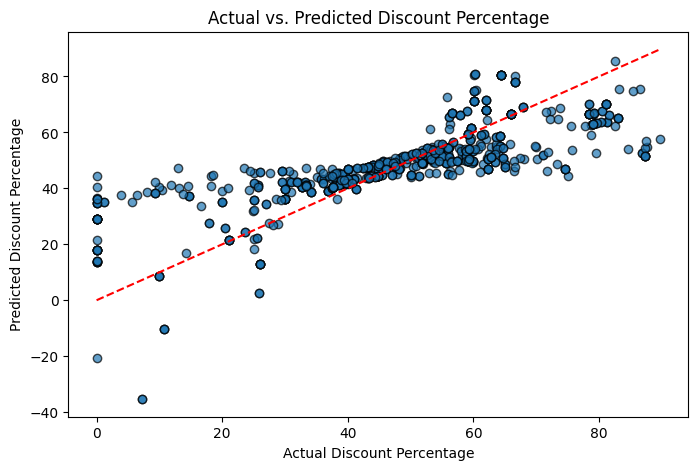

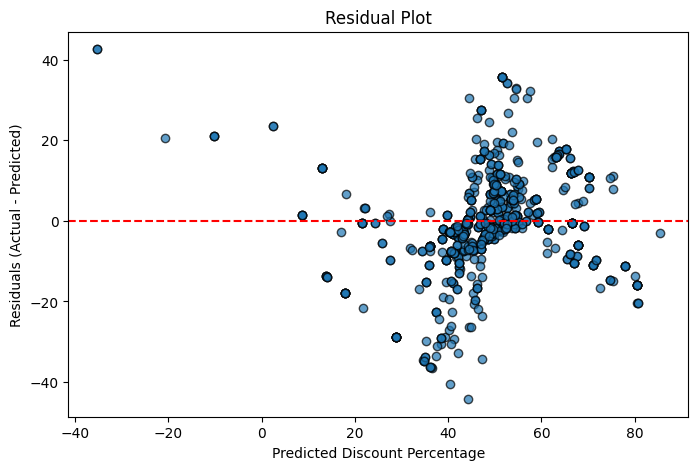

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Value': [mae, mse, rmse, r2]
})
print("Evaluation Metrics:")
print(metrics_df)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Discount Percentage")
plt.ylabel("Predicted Discount Percentage")
plt.title("Actual vs. Predicted Discount Percentage")
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.xlabel("Predicted Discount Percentage")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()


Part 6

In [41]:
incomplete_df = balanced_df.drop(columns=['discount_percentage']).copy()


incomplete_sample = incomplete_df.sample(n=20, random_state=42)[['title', 'price', 'original_price', 'shipping']].copy()

incomplete_sample['shipping_binary'] = incomplete_sample['shipping'].apply(
    lambda x: 1 if x.strip().lower() == "free shipping" else 0
)

X_incomplete = incomplete_sample[['price', 'original_price', 'shipping_binary']]

predicted_discount = model.predict(X_incomplete)

incomplete_sample['Predicted Discount (%)'] = predicted_discount

result_table = incomplete_sample[['title', 'price', 'original_price', 'shipping', 'Predicted Discount (%)']]

print(result_table.to_string(index=False))

                                                                           title   price  original_price                  shipping  Predicted Discount (%)
                                      Apple iPhone 14 128GB Unlocked - Excellent  340.95          799.00 Shipping info unavailable               49.936392
 HP ENVY Laptop Intel Core Ultra 7 155U RTX 3050 32GB RAM 1TB SSD 17.3" FHD W11H  769.99         1099.99 Shipping info unavailable               36.190781
                      Apple iPhone 14 Pro Max 256GB Unlocked Very Good Condition  559.99         1199.00 Shipping info unavailable               50.418167
       Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unlocked Very Good Refurbished  161.95         1199.99             Free shipping               75.384019
                      Apple iPhone 16 Pro Max 256GB Unlocked Excellent Condition  964.99         1699.00             Free shipping               47.696886
                         Samsung Galaxy S22 Ultra 5G S908U 128GB Unloc